<a href="https://colab.research.google.com/github/anaspd/Customer-Service-Chatbot/blob/main/customer_service_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
%%writefile content.json
{"intents":
 [
  {
      "tag":"greeting",
   "input":["hello","hi there","hi","hi, is this opaque shop","hey there","hey"],
   "responses":[
                "Hi welcome to opaque shop!",
                "Hey how can i help you",
                "hello dear customer how can i help you",
                "hello how can i help you",
                "greetings customer how can i help you"
   ]
     },
  {
      "tag":"shop_details",
   "input":["Is this an electronics shop?","Does your shop sell electronics?"],
   "responses":[
                "Yes,our shop sells electronics",
                "Indeed our shop sells electronics"
   ]
     },
     {
      "tag":"location",
   "input":["where is the shop located?","Location of the shop?"],
   "responses":[
                "Chansandra"
   ]
     },
  {
      "tag":"goodbye",
   "input":["Thank you, bye","thank you","bye bye","goodbye,thank you"],
   "responses":["Thank you customer","bye customer","Thank you customer,hope you have a nice day","goodbye customer"]
  }
 ]
 }

Writing content.json


In [3]:
with open('content.json') as content:
  data1 = json.load(content)

In [4]:
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [5]:
data = pd.DataFrame({'inputs':inputs,'tags':tags})
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,hi,greeting
3,"hi, is this opaque shop",greeting
4,hey there,greeting
5,hey,greeting
6,Is this an electronics shop?,shop_details
7,Does your shop sell electronics?,shop_details
8,where is the shop located?,location
9,Location of the shop?,location


In [6]:
import string 
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
                                    

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [8]:
input_shape=x_train.shape[1]
input_shape

5

In [9]:
vocabulary = len(tokenizer.word_index)
print("Number of unique words:", vocabulary)
output_length = le.classes_.shape[0]
print("output length:", output_length)

Number of unique words: 22
output length: 4


In [10]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.3824 - accuracy: 0.2857
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 1.3800 - accuracy: 0.2857
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 1.3776 - accuracy: 0.2857
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 1.3752 - accuracy: 0.2857
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 1.3727 - accuracy: 0.2857
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 1.3702 - accuracy: 0.2857
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 1.3677 - accuracy: 0.2857
Epoch 8/200
1/1 [==============================] - 0s 14ms/step - loss: 1.3651 - accuracy: 0.2857
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 1.3625 - accuracy: 0.2857
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 1.3598 - accuracy: 0.2857
Epoch 11/200
1/1 [===

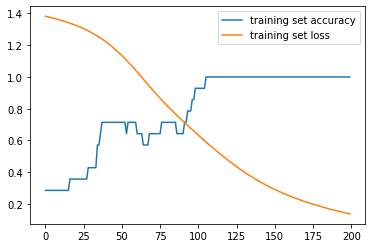

In [13]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [14]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from gtts import gTTS
from IPython.display import Audio
import random
while True:
  texts_p= []
  prediction_input= input('You: ')
  prediction_input= [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input= ''.join(prediction_input)
  texts_p.append(prediction_input)
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input= pad_sequences([prediction_input],input_shape)
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  print("Salesman :",random.choice(responses[response_tag]))
  if response_tag == 'goodbye':
    break

You: hello
Salesman : hello dear customer how can i help you
You: Is this an electronics shop?
Salesman : Yes,our shop sells electronics
You: Location of the shop?
Salesman : Chansandra
You: Thank you
Salesman : Thank you customer
